In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.dates as mdates

In [2]:
data = pd.read_csv('microsoft_cleaned_data.csv')

# Convert Date to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Use only the 'High' price for prediction, but you can add more features
# We will use Open, Low, Close, Adj Close, and Volume as input features
data = data[['Open', 'Low', 'Close', 'Adj Close', 'Volume', 'High']]

# Define the features (independent variables) and the target (dependent variable)
features = ['Open', 'Low', 'Close', 'Volume']  # Features
target = 'High'  # Target is the highest price

X = data[features]  # Independent variables
y = data[target] 

data 


,Open,Low,Close,Adj Close,Volume,High
Date,,,,,,
2010-01-04,30.620001,30.590000,30.950001,23.474922,38409100,31.100000
2010-01-05,30.850000,30.639999,30.959999,23.482502,49749600,31.100000
2010-01-06,30.879999,30.520000,30.770000,23.338396,58182400,31.080000
2010-01-07,30.629999,30.190001,30.450001,23.095678,50559700,30.700001
2010-01-08,30.280001,30.240000,30.660000,23.254963,51197400,30.879999
...,...,...,...,...,...,...
2023-11-16,370.959991,370.179993,376.170013,376.170013,27182300,376.350006
2023-11-17,373.609985,367.000000,369.850006,369.850006,40157000,374.369995
2023-11-20,371.220001,371.000000,377.440002,377.440002,52465100,378.869995


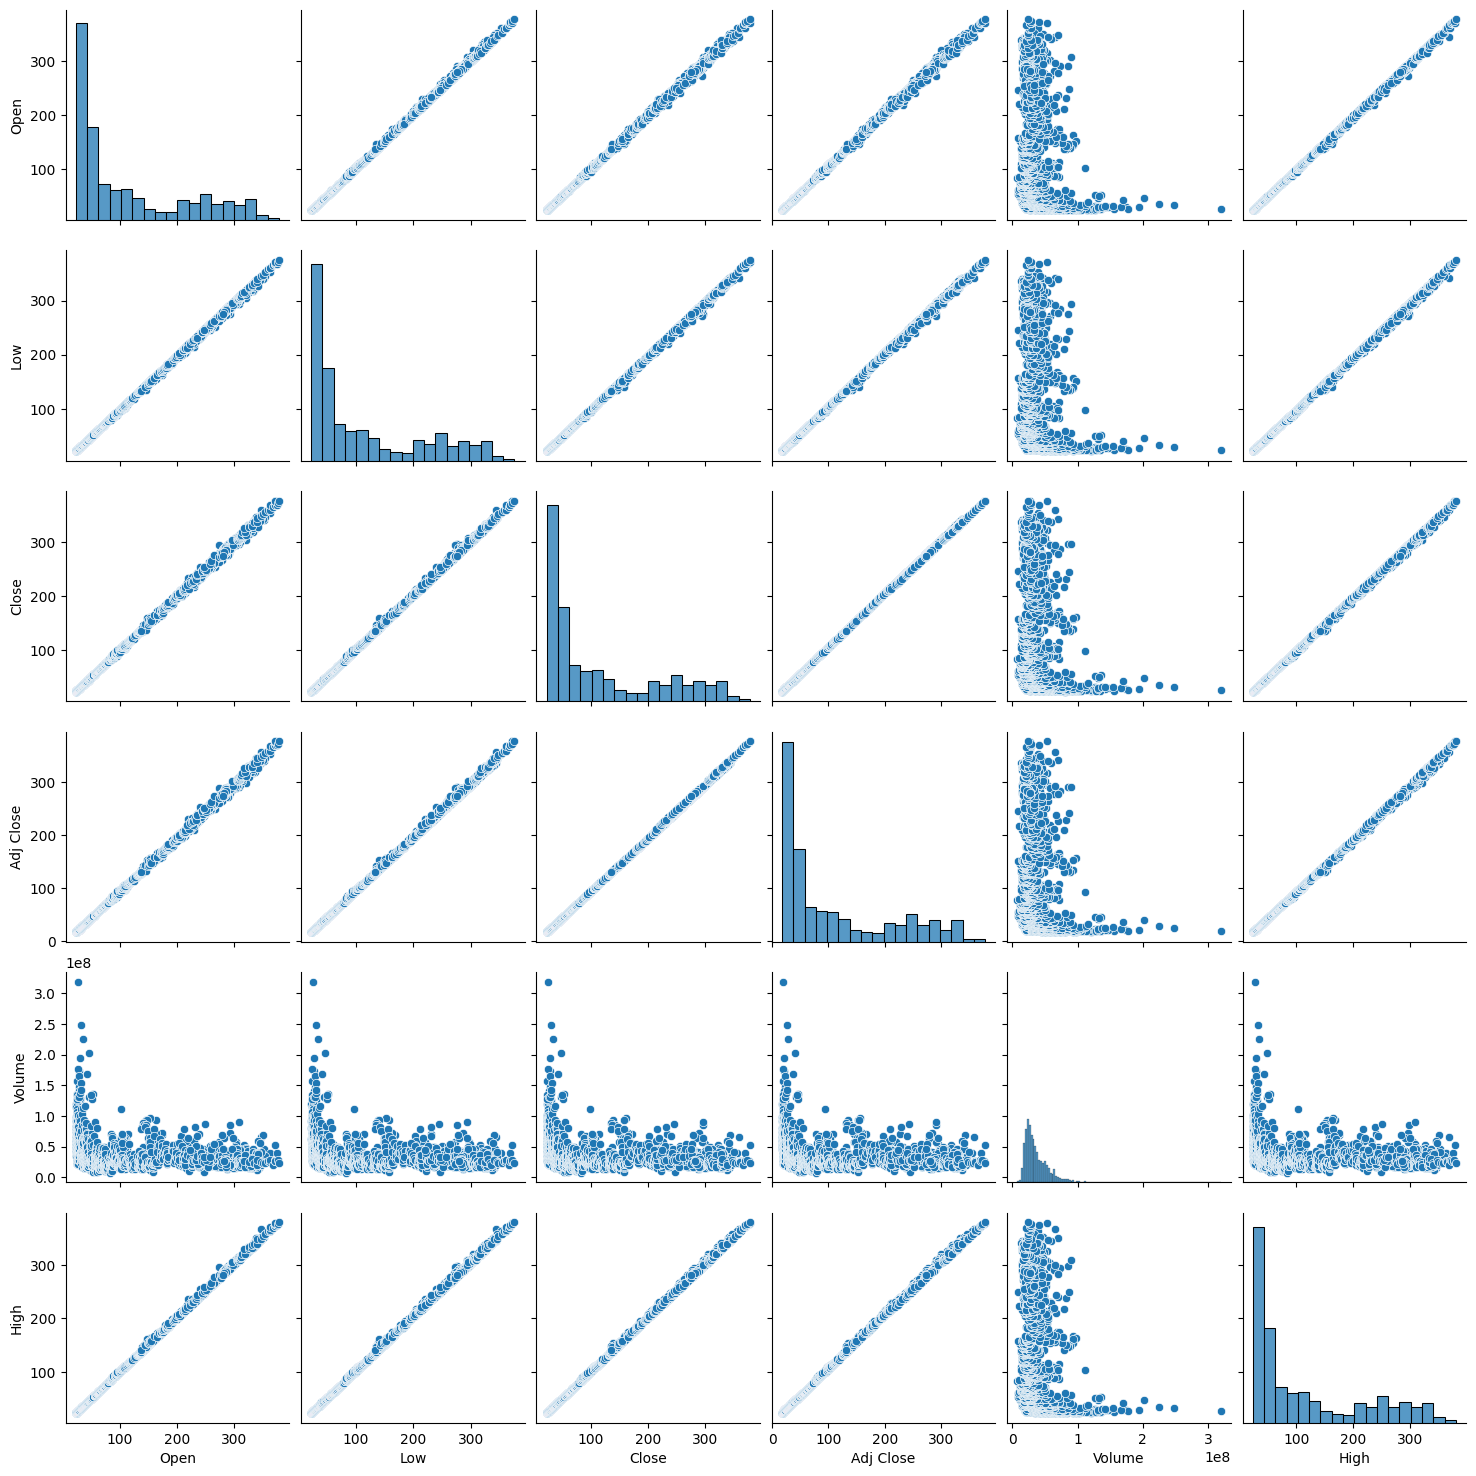

In [3]:
import seaborn as sns  #to plot graphs #for linear regression model
sns.pairplot(data)
plt.show()

In [13]:
# Split data into training and testing sets based on dates
train_df = data[:'2020-12-31']
test_df = data['2021-01-01':]

# Extract features and target from the training and testing DataFrames
X_train = train_df.drop(['High'], axis=1)  # Replace 'target_column' with the actual target column name
y_train = train_df['High']

X_test = test_df.drop(['High'], axis=1)
y_test = test_df['High']

# Check the shapes of the training and testing sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2769, 5)
(2769,)
(728, 5)
(728,)


In [14]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training set
model.fit(X_train_scaled, y_train)

# Print model coefficients (weights)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [158.71614426 -90.12554373 122.4949222   18.74255445   2.11996938]
Intercept: 23.03210135984525


In [16]:
# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Display all predictions in table form
predictions_df = pd.DataFrame({
    'Date': y_test.index,
    'Predicted High Prices': y_pred,
    'Actual High Prices': y_test.values
})

print(predictions_df.head(10))

        Date  Predicted High Prices  Actual High Prices
0 2021-01-04             224.025497          223.000000
1 2021-01-05             219.627999          218.520004
2 2021-01-06             213.633714          216.490005
3 2021-01-07             218.315371          219.339996
4 2021-01-08             221.290620          220.580002
5 2021-01-11             219.823615          218.910004
6 2021-01-12             218.082224          217.100006
7 2021-01-13             216.834896          216.759995
8 2021-01-14             216.636391          217.460007
9 2021-01-15             214.874906          214.509995


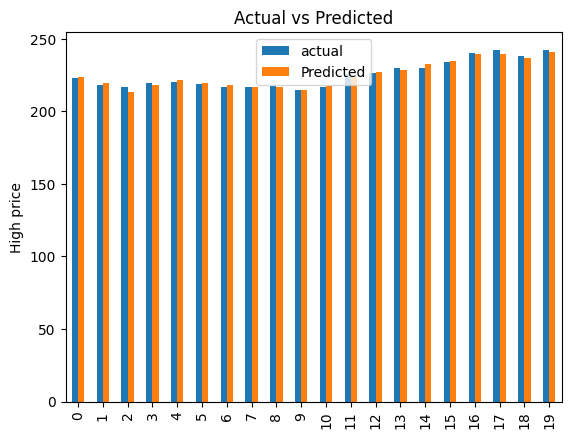

In [8]:
# Load actual and predicted values side by side
dframe = pd.DataFrame({'actual': y_test.values.flatten(), 'Predicted': y_pred})
graph = dframe.head(20)
graph.plot(kind='bar')
plt.title('Actual vs Predicted')
plt.ylabel('High price')
plt.show()


Text(0, 0.5, 'Predicted')

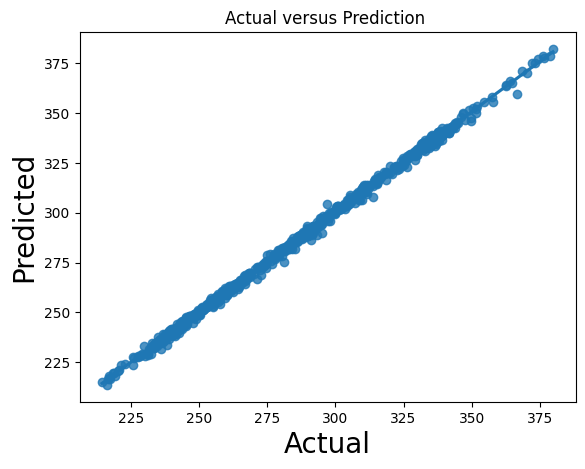

In [9]:
#trying the same with a reg plot(optonal)
sns.regplot(x=y_test, y=predictions_df['Predicted High Prices'])
plt.title('Actual versus Prediction ')
plt.xlabel('Actual', fontsize=20)                         
plt.ylabel('Predicted', fontsize=20)

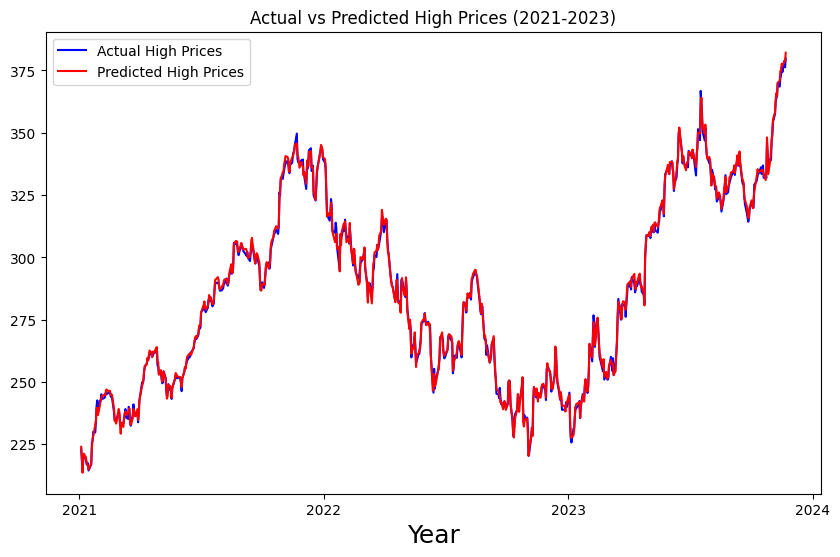

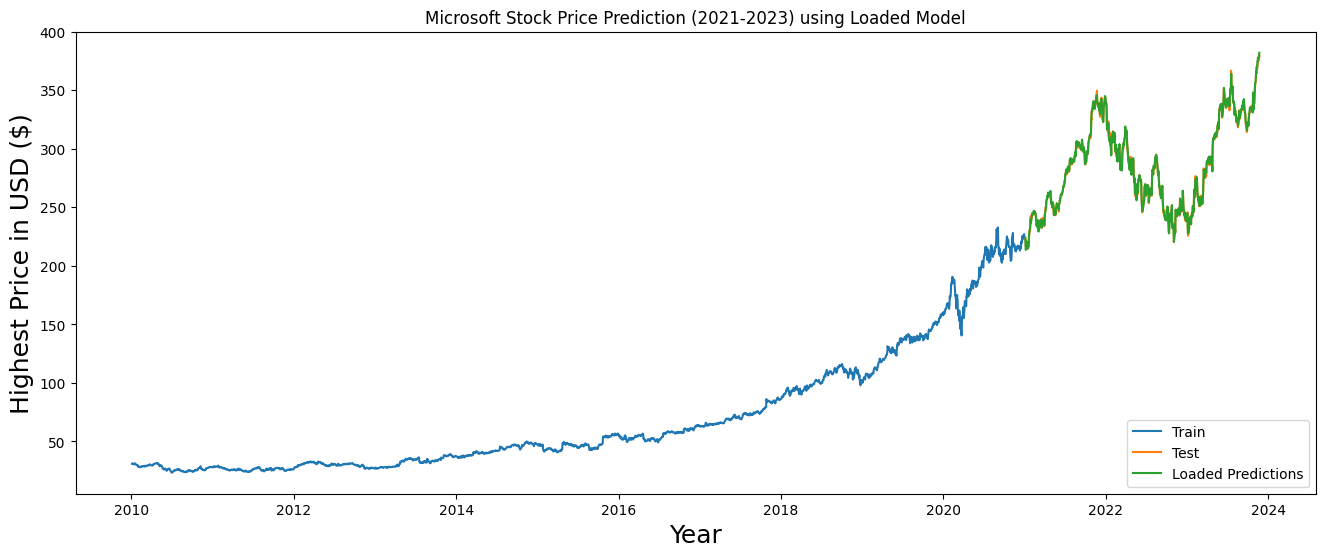

In [10]:
# Define train and valid DataFrames
train = data[:'2020-12-31']
valid = data['2021-01-01':].copy()

# Assuming 'Loaded_Predictions' is already calculated and added to the 'valid' DataFrame
# If not, you need to add the predictions to the 'valid' DataFrame
valid['Loaded_Predictions'] = y_pred

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual High Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted High Prices', color='red')
plt.xlabel('Year', fontsize=18)
plt.title('Actual vs Predicted High Prices (2021-2023)')
plt.legend()

# Format the x-axis to show years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Microsoft Stock Price Prediction (2021-2023) using Loaded Model')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Highest Price in USD ($)', fontsize=18)
plt.plot(train['High'], label='Train')
plt.plot(valid['High'], label='Test')
plt.plot(valid['Loaded_Predictions'], label='Loaded Predictions')
plt.legend(loc='lower right')
plt.show()

In [11]:
# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 1.2114677407271257
Mean Squared Error (MSE): 2.4209797077192103
Root Mean Squared Error (RMSE): 1.5559497767342012


In [12]:
# Example: y = x^2 (a simple parabola)
def cost_function(x):
    return x**2

# Gradient of the cost function: derivative of x^2 is 2x
def gradient(x):
    return 2*x

# Gradient Descent Algorithm
def gradient_descent(starting_point, learning_rate, n_iterations):
    x = starting_point
    for i in range(n_iterations):
        grad = gradient(x)
        x = x - learning_rate * grad
        print(f"Iteration {i+1}: x = {x}, cost = {cost_function(x)}")

# Start at x = 10, learning rate of 0.1, and run for 10 iterations
gradient_descent(starting_point=10, learning_rate=0.1, n_iterations=10)

# Gradient Descent Algorithm for Linear Regression
def gradient_descent_linear_regression(X, y, learning_rate, n_iterations):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term (column of ones)
    theta = np.random.randn(n + 1)  # Initialize weights randomly

    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients

        if iteration % 100 == 0:
            cost = np.mean((X_b.dot(theta) - y) ** 2)
            print(f"Iteration {iteration}: Cost {cost:.2f}")

    return theta

# Prepare data
X = X_train_scaled
y = y_train

# Run gradient descent
theta = gradient_descent_linear_regression(X, y, learning_rate=0.1, n_iterations=1000)

# Display final weights
print(f"b,w found by gradient descent: {theta[0]:.2f},{theta[1:]}")

# Make predictions
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]
y_pred_gd = X_test_b.dot(theta)

# Display some predictions
for i in range(3):
    print(f"prediction: {y_pred_gd[i]:.2f}, target value: {y_test.iloc[i]}")

Iteration 1: x = 8.0, cost = 64.0
Iteration 2: x = 6.4, cost = 40.96000000000001
Iteration 3: x = 5.12, cost = 26.2144
Iteration 4: x = 4.096, cost = 16.777216
Iteration 5: x = 3.2768, cost = 10.73741824
Iteration 6: x = 2.62144, cost = 6.871947673600001
Iteration 7: x = 2.0971520000000003, cost = 4.398046511104002
Iteration 8: x = 1.6777216000000004, cost = 2.8147497671065613
Iteration 9: x = 1.3421772800000003, cost = 1.801439850948199
Iteration 10: x = 1.0737418240000003, cost = 1.1529215046068475
Iteration 0: Cost 4792.07
Iteration 100: Cost 1.07
Iteration 200: Cost 0.68
Iteration 300: Cost 0.65
Iteration 400: Cost 0.63
Iteration 500: Cost 0.61
Iteration 600: Cost 0.60
Iteration 700: Cost 0.59
Iteration 800: Cost 0.58
Iteration 900: Cost 0.57
b,w found by gradient descent: 22.94,[52.27879023 52.23325753 52.24422591 53.10267217  2.16054539]
prediction: 221.27, target value: 223.0
prediction: 220.18, target value: 218.520004
prediction: 215.19, target value: 216.490005
